In [188]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [40]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [42]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [43]:
# Create the inspector
inspector = inspect(engine)
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [44]:
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## D1: Determine the Summary Statistics for June

In [45]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temperatures = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == "06").all()
# june_temperatures

In [46]:
#  3. Convert the June temperatures to a list.
june_temp = list(june_temperatures)
# june_temp

In [53]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['date', 'temperature'])
june_temp_df.set_index(june_temp_df['date'], inplace=False)
june_temp_df.head()

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [54]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [56]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temperatures = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == "12" ).all()
# december_temperatures

In [58]:
# 7. Convert the December temperatures to a list.
december_temp = list(december_temperatures)
# december_temp

In [59]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp, columns=['date', 'temperature'])
december_temp_df.set_index(december_temp_df['date'], inplace=False)
december_temp_df.head()

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [61]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional queries

In [85]:
# Precipitation analysis June
june_precipitation = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == "06").all()
# june_precipitation
june_prec = list(june_precipitation)
# june_prec
june_prec_df = pd.DataFrame(june_prec, columns=['date', 'precipitation'])
june_prec_df.set_index(june_prec_df['date'], inplace=False)
# june_prec_df.head()
june_prec_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [89]:
# Precipitation analysis December
december_precipitation = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == "12").all()
# december_precipitation
december_prec = list(december_precipitation)
# december_prec
december_prec_df = pd.DataFrame(december_prec, columns=['date', 'precipitation'])
december_prec_df.set_index(december_prec_df['date'], inplace=False)
# december_prec_df.head()
december_prec_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [96]:
# Precipitation analysis merge June and December
merged_statistics = pd.merge(june_prec_df.describe(), december_prec_df.describe(), left_index=True, right_index=True, suffixes=(' June', ' December'))
merged_statistics

,precipitation June,precipitation December
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


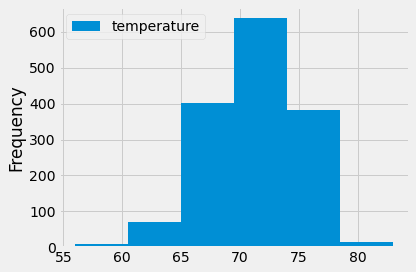

In [190]:
december_temp_df.plot.hist(bins=6)
plt.tight_layout()

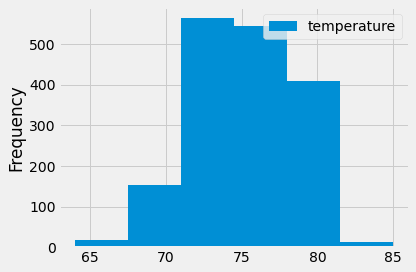

In [193]:
june_temp_df.plot.hist(bins=6)
plt.tight_layout()